In [1]:
import sys
print(sys.version)

3.6.5 |Anaconda custom (64-bit)| (default, Mar 29 2018, 13:14:23) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
matplotlib.rcParams.update({'font.size': 6})
%config InlineBackend.rc = {}
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 300

#from celerite import plot_setup
#plot_setup.setup()

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import numpy as np
from tqdm import tqdm

In [10]:
def bootstrap_resample(X, n=None):
    """! Returns bootstrap resample of an array
    taken from http://fab.cba.mit.edu/classes/864.14/students/Royall_Emily/svdmatrix.py
    
    @param[in] X         array to resample
    @param[in]           length of resampled array, equal to length of input array if left at None
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

# Initial investigation

In [6]:
# delta_t in seconds - that is 100 days
delta_t=8640000
# number of points
num_points=2**24

In [7]:
ER_curve = np.zeros(num_points, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/Lia/results_main_cuFFT_v15_ERDF13_BPL6_length4_1.bin', dtype = float)

In [8]:
# length of the whole light-curve
# time in years
time_in_years=len(ER_curve)*100/3.65
# time in MegaYears
time_in_Megayears=time_in_years/10**6

Text(0, 0.5, 'log(Edd. ratio)')

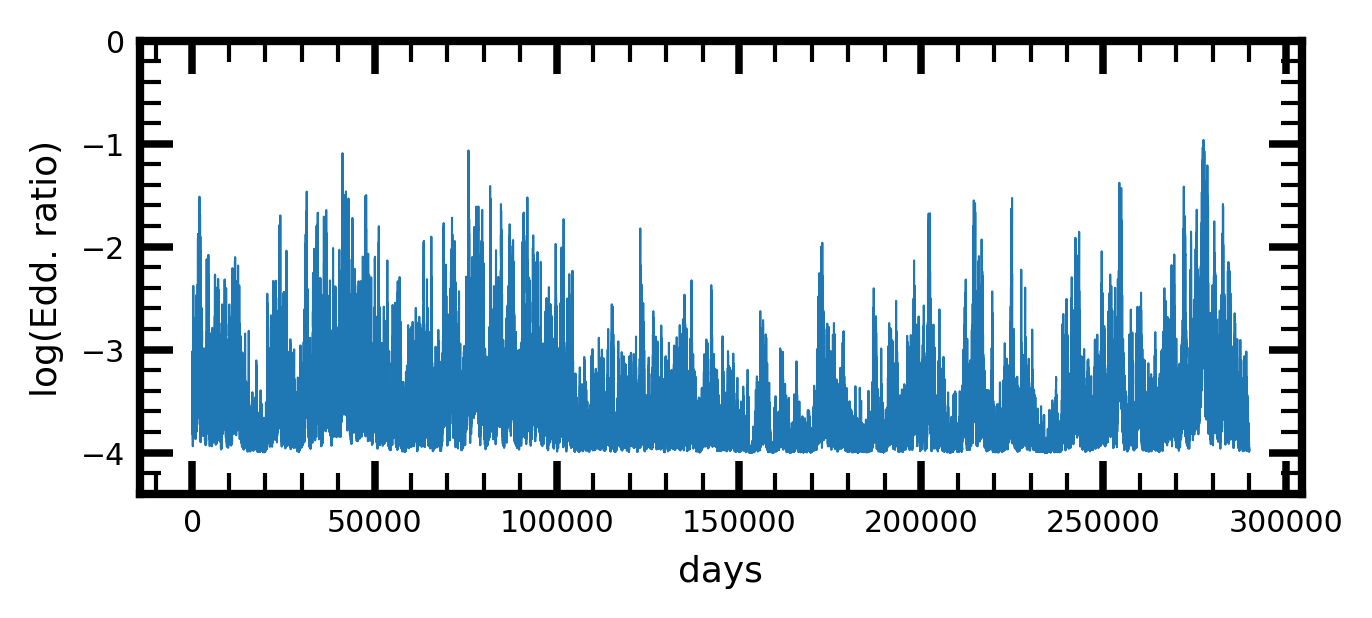

In [76]:
plt.figure(figsize=(5,2))
plt.plot(np.log10(ER_curve[10000:300000]),lw=0.5)
plt.ylim(-4.4,0)
plt.xlabel('days')
plt.ylabel('log(Edd. ratio)')

Text(0, 0.5, 'Number of data points')

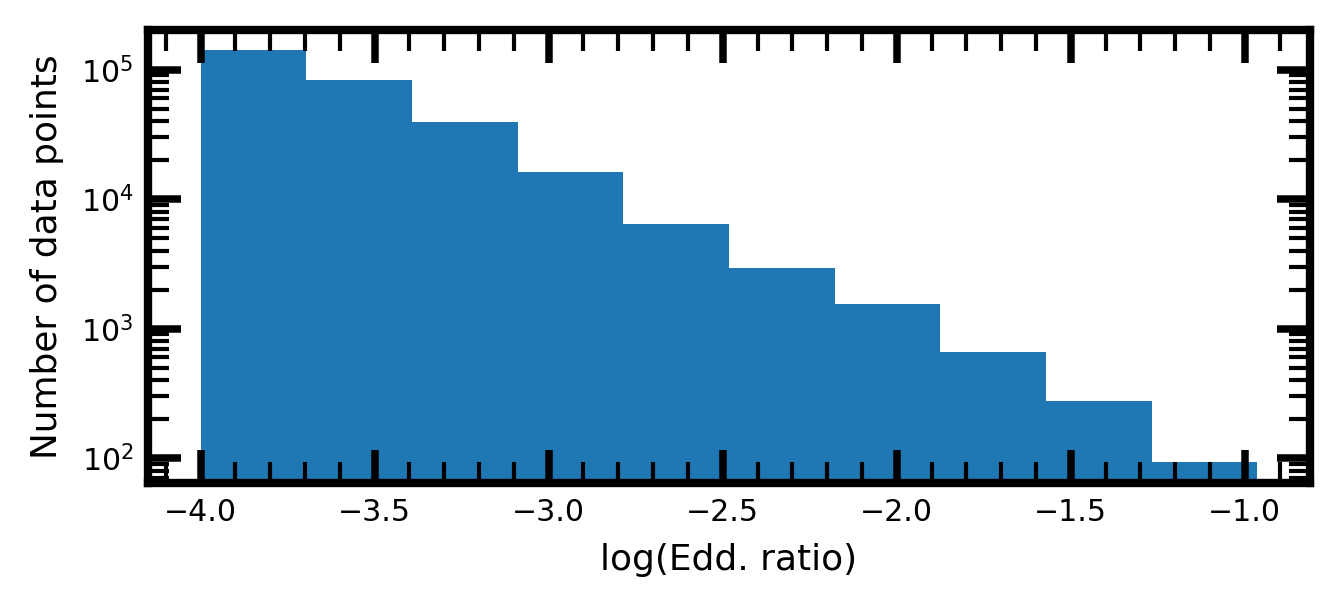

In [78]:
plt.figure(figsize=(5,2))
plt.hist(np.log10(ER_curve[10000:300000]))
plt.yscale('log', nonposy='clip')
plt.xlabel('log(Edd. ratio)')
plt.ylabel('Number of data points')

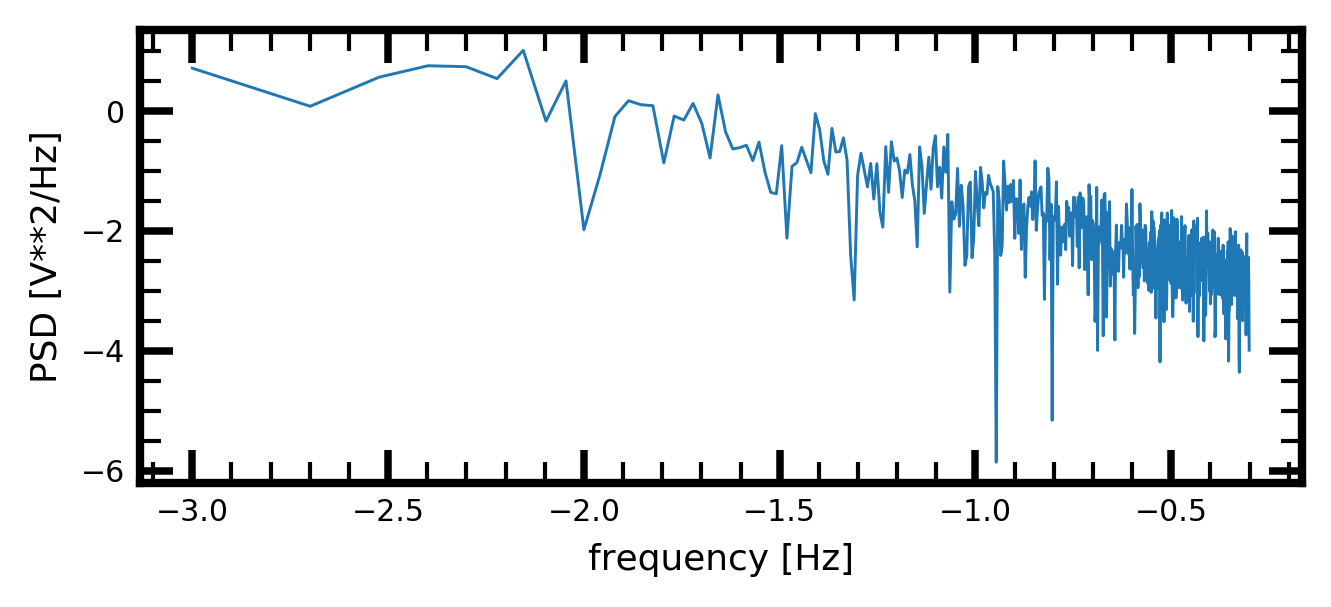

In [82]:
from scipy import signal
plt.figure(figsize=(5,2))
Pxx_den = signal.periodogram(x)
plt.plot(np.log10(Pxx_den[0][1:]),np.log10(Pxx_den[1][1:]),lw=0.7)

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [83]:
full_log_Er_curve=np.log10(ER_curve)

### initial analysis

In [ ]:
shuffled_deck

In [84]:
# test if after 900 days the average flux will fall if you selected object above some cut

# test case without any cuts
testing_times=np.random.randint(low=0,high=len(full_log_Er_curve)-9,size=10000)

res_no_cut=[]
for i in testing_times:
    res_no_cut.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))

In [92]:
# find the positions when the Eddington ratio is high
positions_of_high_Ed_ratio=np.array(range(0,len(full_log_Er_curve)))[full_log_Er_curve>-1]

positions_of_m1_m15_Ed_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>-1.5)&(full_log_Er_curve<-1.0)]
positions_of_m15_m2_Ed_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>-2.0)&(full_log_Er_curve<-1.5)]
positions_of_m2_m25_Ed_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>-2.5)&(full_log_Er_curve<-2.0)]
positions_of_m25_m3_Ed_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>-3.0)&(full_log_Er_curve<-2.5)]



In [93]:
# find the interesect of the testing times and high Eddington ratio - show the size of the array
testing_times_with_high_Ed_ratio=np.intersect1d(testing_times,positions_of_high_Ed_ratio)

testing_times_with_m1_m15_Ed_ratio=np.intersect1d(testing_times,positions_of_m1_m15_Ed_ratio)
testing_times_with_m15_m2_Ed_ratio=np.intersect1d(testing_times,positions_of_m15_m2_Ed_ratio)
testing_times_with_m2_m25_Ed_ratio=np.intersect1d(testing_times,positions_of_m2_m25_Ed_ratio)
testing_times_with_m25_m3_Ed_ratio=np.intersect1d(testing_times,positions_of_m25_m3_Ed_ratio)


print(len(testing_times_with_high_Ed_ratio))

151


In [100]:
res_cut=[]
for i in testing_times_with_high_Ed_ratio:
    res_cut.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))
    
res_m1_m15=[]
for i in testing_times_with_m1_m15_Ed_ratio:
    res_m1_m15.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))
    
res_m15_m2=[]
for i in testing_times_with_m15_m2_Ed_ratio:
    res_m15_m2.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))
    
res_m2_m25=[]
for i in testing_times_with_m2_m25_Ed_ratio:
    res_m2_m25.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))
    
res_m25_m3=[]
for i in testing_times_with_m25_m3_Ed_ratio:
    res_m25_m3.append(np.abs(full_log_Er_curve[i])-np.abs(full_log_Er_curve[i+9]))

Text(0.5, 0, '$\\Delta$ log(Edd. ratio) in 900 days')

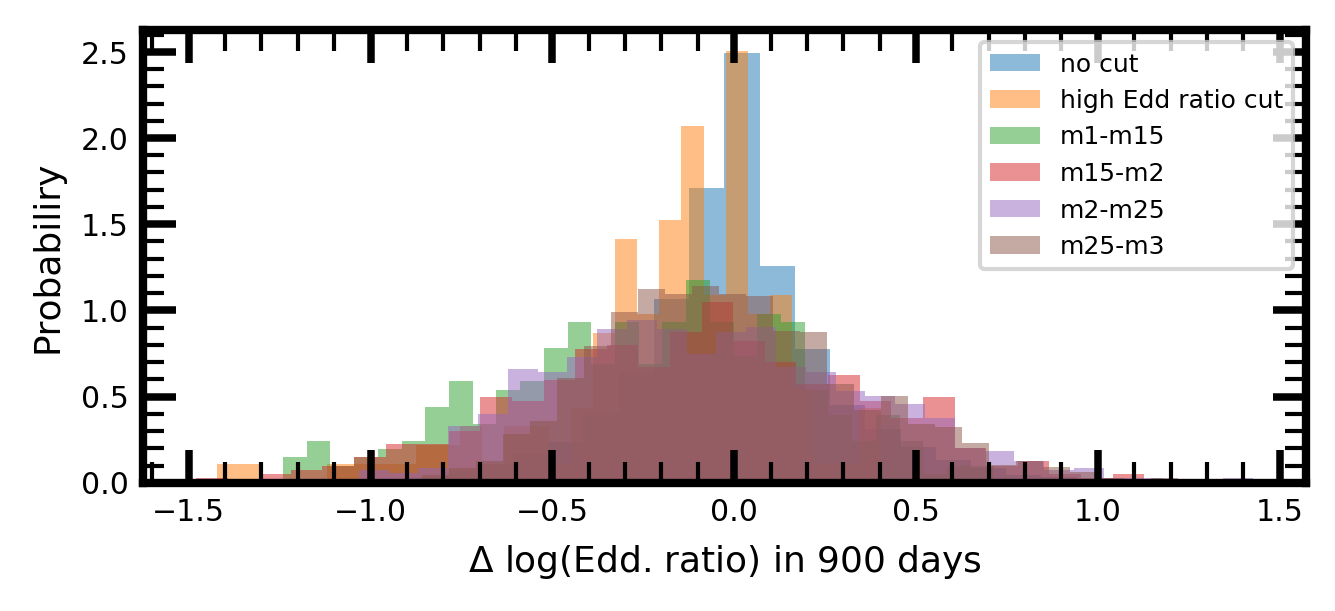

In [103]:
plt.figure(figsize=(5,2))
plt.hist(res_no_cut,alpha=0.5, normed=True,label='no cut',bins=30)
plt.hist(res_cut,alpha=0.5, normed=True,label='high Edd ratio cut' ,bins=30)

plt.hist(res_m1_m15,alpha=0.5, normed=True,label='m1-m15',bins=30)
plt.hist(res_m15_m2,alpha=0.5, normed=True,label='m15-m2',bins=30)
plt.hist(res_m2_m25,alpha=0.5, normed=True,label='m2-m25',bins=30)
plt.hist(res_m25_m3,alpha=0.5, normed=True,label='m25-m3',bins=30)

plt.legend()
plt.ylabel('Probabiliry')
plt.xlabel('$\Delta$ log(Edd. ratio) in 900 days')

In [72]:
# objects with high Edd. ratio have more? variability.... grrrr 
print('res_cut: '+str(np.std(res_cut)))
print('res_no_cut: '+str(np.std(res_no_cut)))

res_cut: 0.3749332471513701
res_no_cut: 0.28174674665498395


In [104]:
# objects with high Edd. ratio have more? variability.... grrrr 
print('res_m1_m15: '+str(np.std(res_m1_m15)))
print('res_m15_m2: '+str(np.std(res_m15_m2)))
print('res_m2_m25: '+str(np.std(res_m2_m25)))
print('res_m25_m3: '+str(np.std(res_m25_m3)))

res_m1_m15: 0.40315545032531946
res_m15_m2: 0.45498211298112856
res_m2_m25: 0.425069467334682
res_m25_m3: 0.3587108804167166


In [105]:
# objects with high Edd. ratio have more? variability.... grrrr 
print('res_m1_m15: '+str(np.mean(res_m1_m15)))
print('res_m15_m2: '+str(np.mean(res_m15_m2)))
print('res_m2_m25: '+str(np.mean(res_m2_m25)))
print('res_m25_m3: '+str(np.mean(res_m25_m3)))

res_m1_m15: -0.2321777995690877
res_m15_m2: -0.11072110572653542
res_m2_m25: -0.05687324750514154
res_m25_m3: -0.002430130025674791


# Observed effects

In [260]:
testing_times=np.unique(np.random.randint(low=0,high=len(full_log_Er_curve)-9,size=1200000))
len(testing_times)

1158243

In [261]:
positions_of_many_specific_Edd_ratios=[]
for Edd in tqdm(np.arange(-4,1.0,0.1)):
    positions_of_specific_Edd_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>Edd)&(full_log_Er_curve<(Edd+0.1))]
    positions_of_many_specific_Edd_ratios.append(positions_of_specific_Edd_ratio)

100%|█████████████████████████████████████████████████████████████████| 50/50 [03:02<00:00,  3.62s/it]


In [262]:
positions_of_many_testing_times_with_specific_Edd_ratio=[]
for Edd_index in range(len(positions_of_many_specific_Edd_ratios)):
    positions_of_single_testing_times_with_specific_Edd_ratio=np.intersect1d(testing_times,positions_of_many_specific_Edd_ratios[Edd_index])
    positions_of_many_testing_times_with_specific_Edd_ratio.append(positions_of_single_testing_times_with_specific_Edd_ratio)

In [302]:
list_of_res_cut_as_function_of_Edd_ratio=[]
for j in range(len(positions_of_many_testing_times_with_specific_Edd_ratio)):
    res_cut=[]
    for i in positions_of_many_testing_times_with_specific_Edd_ratio[j]:
        res_cut.append(full_log_Er_curve[i]-full_log_Er_curve[i+9])
    list_of_res_cut_as_function_of_Edd_ratio.append(res_cut)
    
list_of_res_cut_as_function_of_Edd_ratio=np.array(list_of_res_cut_as_function_of_Edd_ratio)

In [303]:
measured_std_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.std(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_std_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_std_as_fun_of_Edd_ratio=np.array(measured_std_as_fun_of_Edd_ratio)

In [304]:
matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams.update({'xtick.major.size': 5})
matplotlib.rcParams.update({'xtick.minor.size': 3})
matplotlib.rcParams.update({'xtick.major.width': 1.0})
matplotlib.rcParams.update({'xtick.minor.width': 0.4})

matplotlib.rcParams.update({'ytick.major.size': 5})
matplotlib.rcParams.update({'ytick.minor.size': 3})
matplotlib.rcParams.update({'ytick.major.width': 1.0})
matplotlib.rcParams.update({'ytick.minor.width': 0.4})

matplotlib.rcParams.update({'axes.linewidth': 1.2})
matplotlib.rcParams.update({'ytick.right': True})

Text(-0.48, -0.048, '$\\lambda^{*}$')

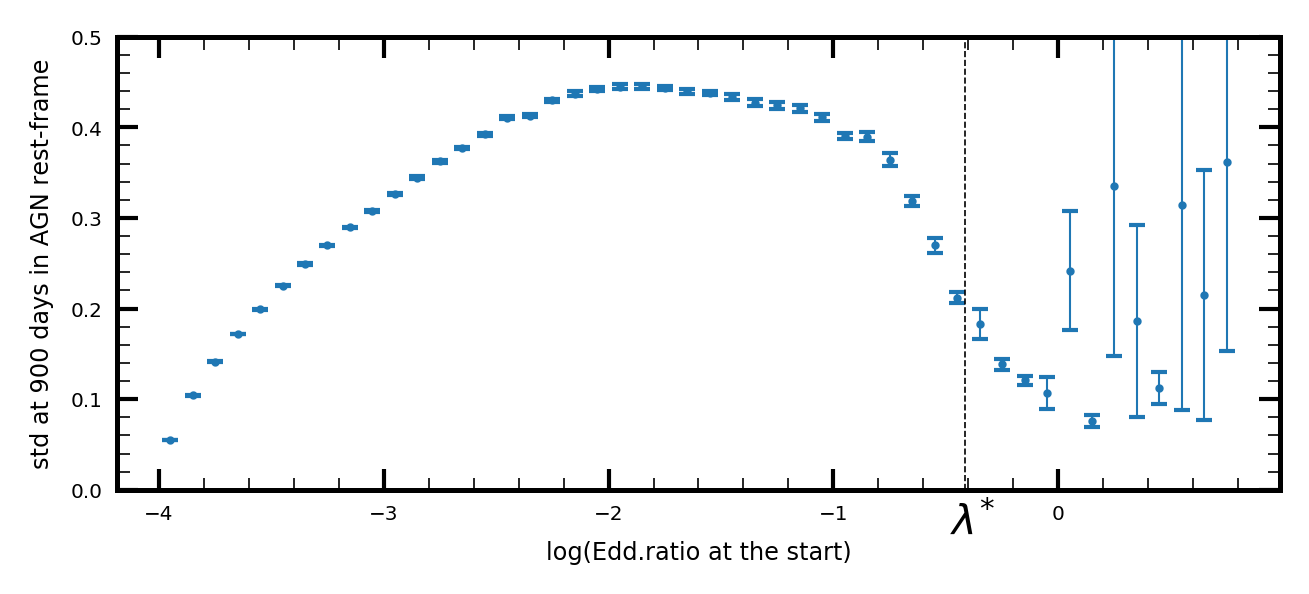

In [359]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_std_as_fun_of_Edd_ratio[:,0],yerr=measured_std_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('std at 900 days in AGN rest-frame')
plt.ylim(0,0.5)
plt.text(-0.48,-0.048,'$\lambda^{*}$',fontsize=10)

In [310]:
measured_mean_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.mean(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_mean_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_mean_as_fun_of_Edd_ratio=np.array(measured_mean_as_fun_of_Edd_ratio)


measured_median_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.median(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_median_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_median_as_fun_of_Edd_ratio=np.array(measured_median_as_fun_of_Edd_ratio)

Text(-0.48, -0.26, '$\\lambda^{*}$')

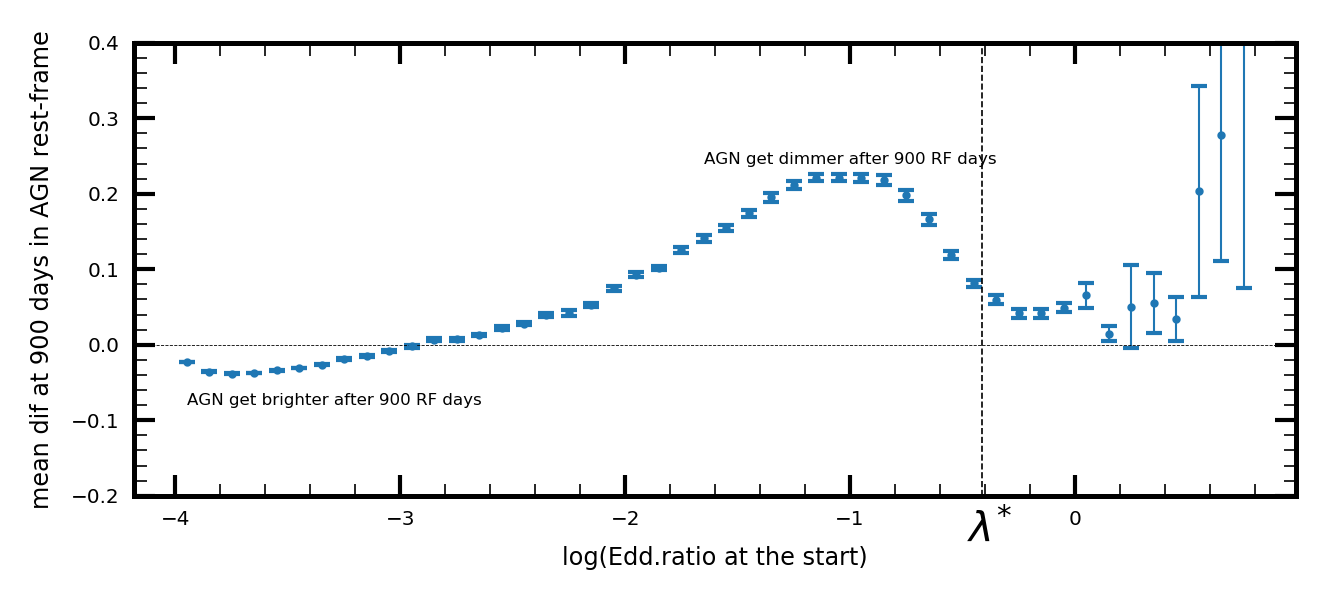

In [358]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_mean_as_fun_of_Edd_ratio[:,0],yerr=measured_mean_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('mean dif at 900 days in AGN rest-frame')
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.4)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.24,'AGN get dimmer after 900 RF days')
plt.text(-0.48,-0.26,'$\lambda^{*}$',fontsize=10)

Text(-1.65, 0.2, 'AGN get dimmer after 900 RF days')

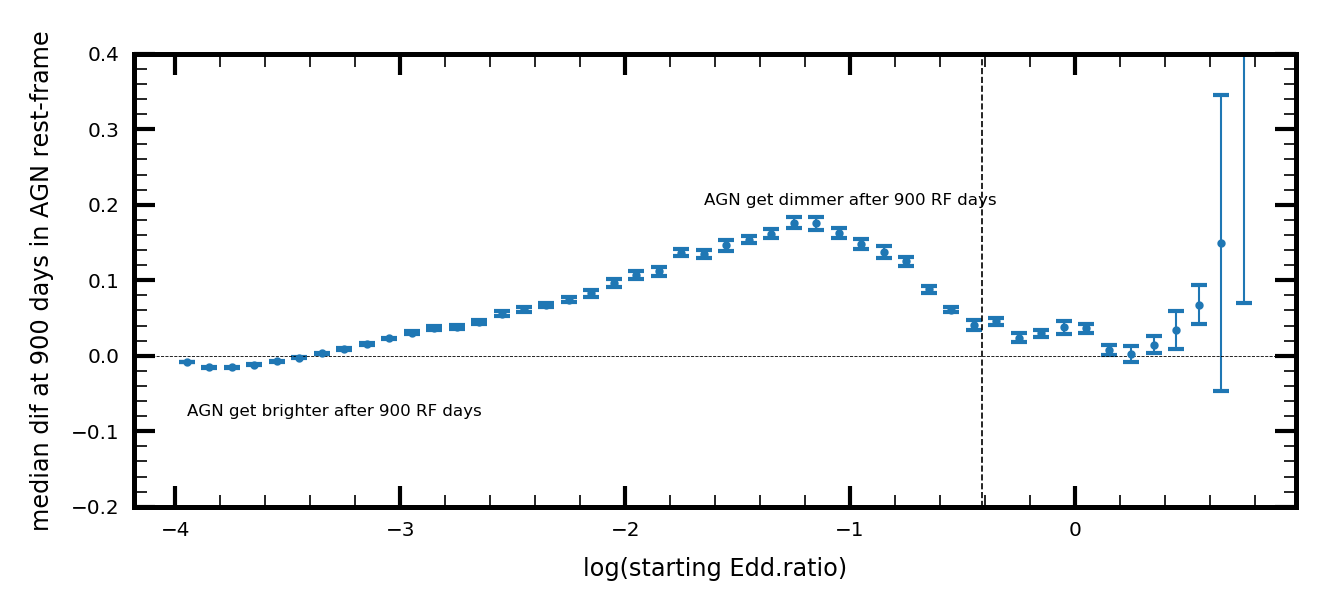

In [335]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_median_as_fun_of_Edd_ratio[:,0],yerr=measured_median_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('median dif at 900 days in AGN rest-frame')
plt.ylim(0,0.4)
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.4)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.2,'AGN get dimmer after 900 RF days')

# Investigation of the BPL8 set of light-curves

In [12]:
# delta_t in seconds - that is 100 days
delta_t=901565
# number of points
num_points=2**24

print('delta_t: '+str(delta_t/(24*3600))+' days')

ER_curve = np.zeros(num_points, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/Lia_Data/results_main_cuFFT_v15_ERDF01_BPL8_24_lengthLSST_1.bin', dtype = float)

delta_t: 10.434780092592593 days


In [13]:
full_log_Er_curve=np.log10(ER_curve)

In [14]:
testing_times=np.unique(np.random.randint(low=0,high=len(full_log_Er_curve)-90,size=1200000))
len(testing_times)

1158195

In [15]:
positions_of_many_specific_Edd_ratios=[]
for Edd in tqdm(np.arange(-4,1.0,0.1)):
    positions_of_specific_Edd_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>Edd)&(full_log_Er_curve<(Edd+0.1))]
    positions_of_many_specific_Edd_ratios.append(positions_of_specific_Edd_ratio)

100%|██████████| 50/50 [02:42<00:00,  3.25s/it]


In [16]:
positions_of_many_testing_times_with_specific_Edd_ratio=[]
for Edd_index in range(len(positions_of_many_specific_Edd_ratios)):
    positions_of_single_testing_times_with_specific_Edd_ratio=np.intersect1d(testing_times,positions_of_many_specific_Edd_ratios[Edd_index])
    positions_of_many_testing_times_with_specific_Edd_ratio.append(positions_of_single_testing_times_with_specific_Edd_ratio)

In [24]:
list_of_res_cut_as_function_of_Edd_ratio=[]
for j in range(len(positions_of_many_testing_times_with_specific_Edd_ratio)):
    res_cut=[]
    for i in positions_of_many_testing_times_with_specific_Edd_ratio[j]:
        res_cut.append(full_log_Er_curve[i]-full_log_Er_curve[i+90])
    list_of_res_cut_as_function_of_Edd_ratio.append(res_cut)
    
list_of_res_cut_as_function_of_Edd_ratio=np.array(list_of_res_cut_as_function_of_Edd_ratio)

In [25]:
measured_std_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.std(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_std_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_std_as_fun_of_Edd_ratio=np.array(measured_std_as_fun_of_Edd_ratio)

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams.update({'xtick.major.size': 5})
matplotlib.rcParams.update({'xtick.minor.size': 3})
matplotlib.rcParams.update({'xtick.major.width': 1.0})
matplotlib.rcParams.update({'xtick.minor.width': 0.4})

matplotlib.rcParams.update({'ytick.major.size': 5})
matplotlib.rcParams.update({'ytick.minor.size': 3})
matplotlib.rcParams.update({'ytick.major.width': 1.0})
matplotlib.rcParams.update({'ytick.minor.width': 0.4})

matplotlib.rcParams.update({'axes.linewidth': 1.2})
matplotlib.rcParams.update({'ytick.right': True})

Text(-0.48,-0.048,'$\\lambda^{*}$')

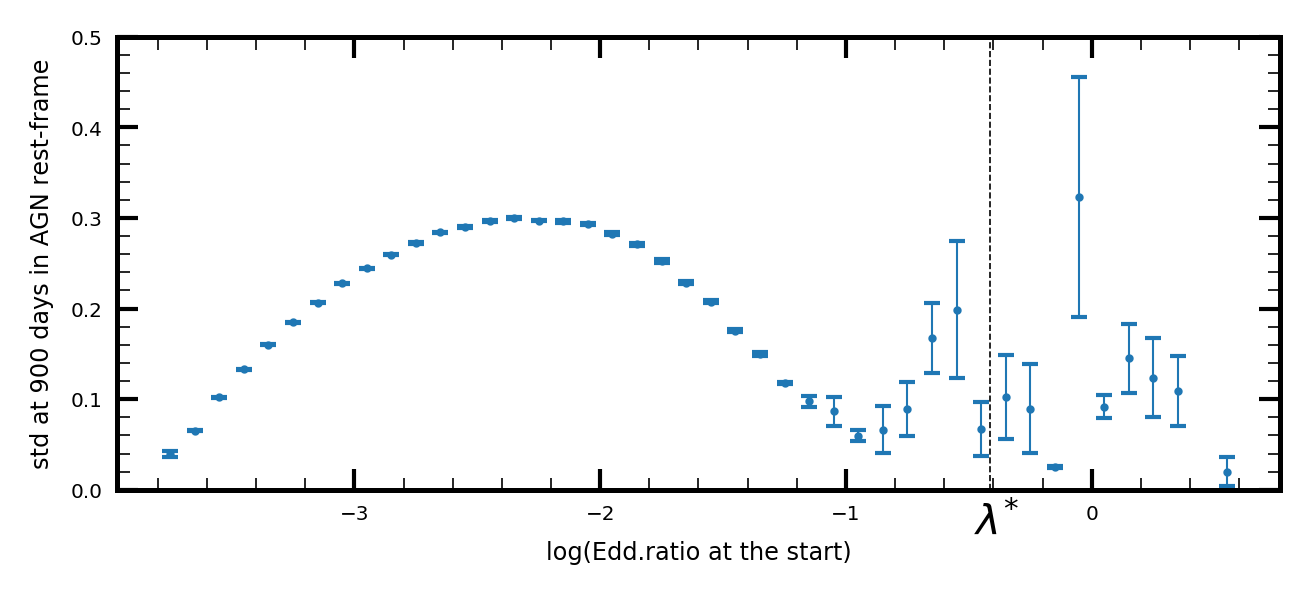

In [27]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_std_as_fun_of_Edd_ratio[:,0],yerr=measured_std_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('std at 900 days in AGN rest-frame')
plt.ylim(0,0.5)
plt.text(-0.48,-0.048,'$\lambda^{*}$',fontsize=10)

In [28]:
measured_mean_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.mean(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_mean_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_mean_as_fun_of_Edd_ratio=np.array(measured_mean_as_fun_of_Edd_ratio)


measured_median_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.median(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_median_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_median_as_fun_of_Edd_ratio=np.array(measured_median_as_fun_of_Edd_ratio)

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(-0.48,-0.26,'$\\lambda^{*}$')

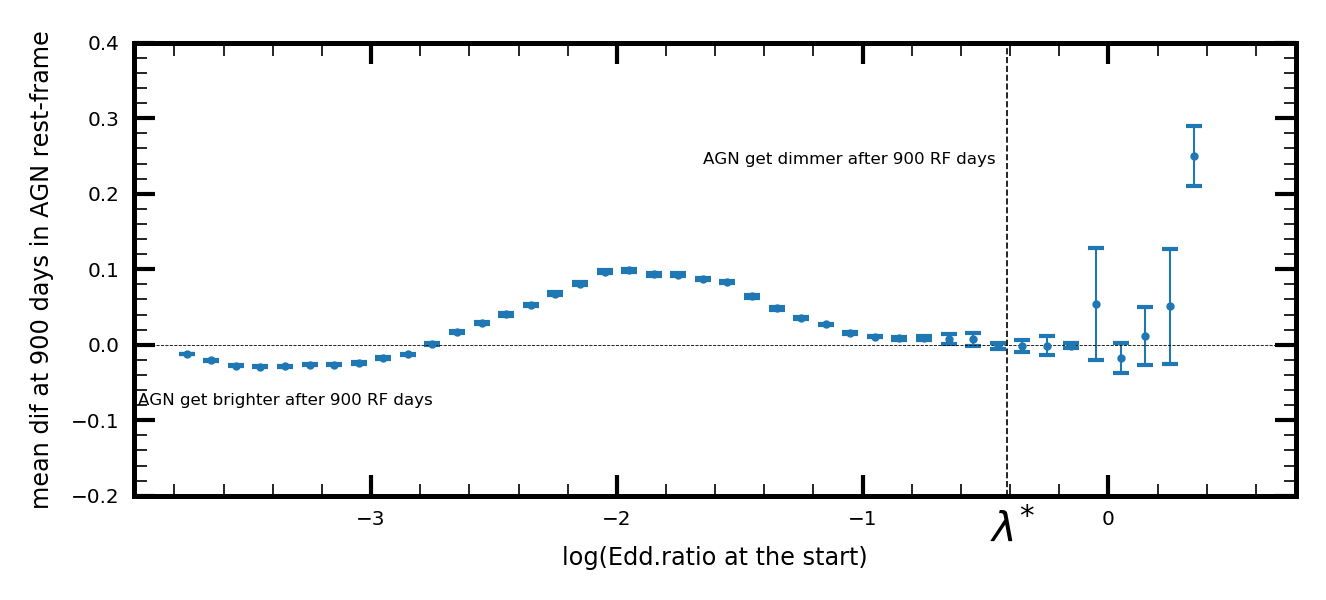

In [29]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_mean_as_fun_of_Edd_ratio[:,0],yerr=measured_mean_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('mean dif at 900 days in AGN rest-frame')
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.4)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.24,'AGN get dimmer after 900 RF days')
plt.text(-0.48,-0.26,'$\lambda^{*}$',fontsize=10)

Text(-1.65,0.2,'AGN get dimmer after 900 RF days')

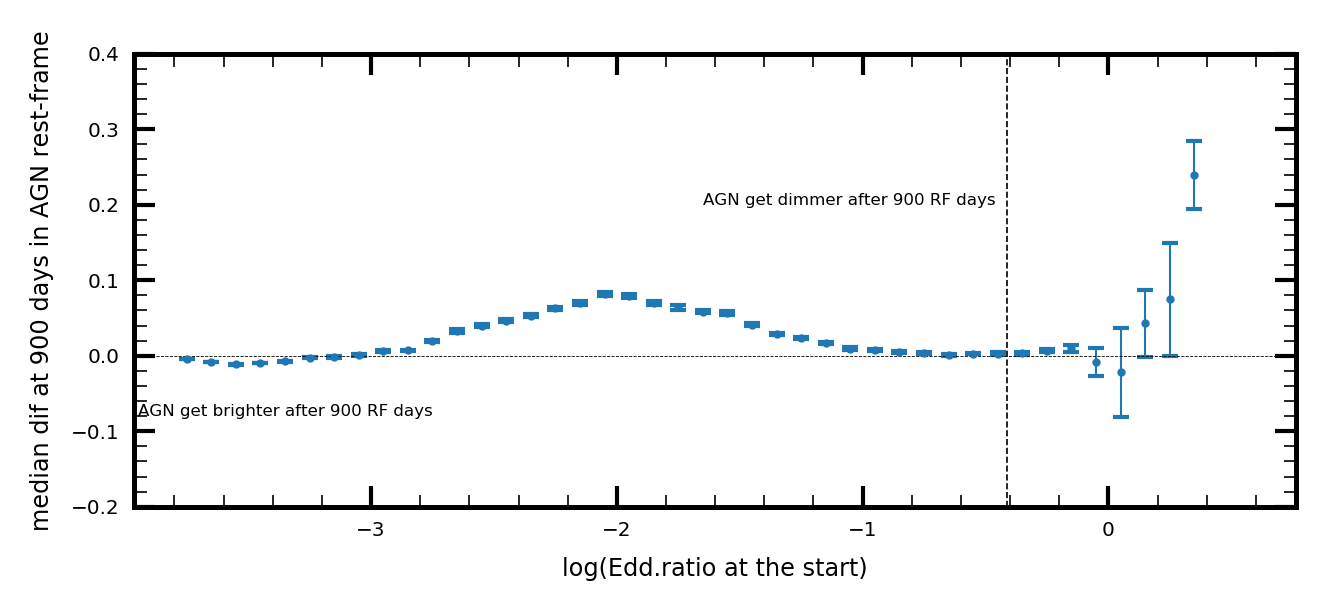

In [30]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_median_as_fun_of_Edd_ratio[:,0],yerr=measured_median_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('median dif at 900 days in AGN rest-frame')
plt.ylim(0,0.4)
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.4)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.2,'AGN get dimmer after 900 RF days')

# Investigation of the BPL7 set of light-curves

In [52]:
# delta_t in seconds - that is 100 days
delta_t=8640000
# number of points
num_points=2**24

print('delta_t: '+str(delta_t/(24*3600))+' days')

ER_curve = np.zeros(num_points, dtype = float)
ER_curve = np.fromfile('/Users/nevencaplar/Documents/Variability/Lia_Data/results_main_cuFFT_v15_ERDF13_BPL7_length4_99.bin', dtype = float)

delta_t: 100.0 days


In [53]:
full_log_Er_curve=np.log10(ER_curve)

In [54]:
testing_times=np.unique(np.random.randint(low=0,high=len(full_log_Er_curve)-9,size=1200000))
len(testing_times)

1158455

In [55]:
positions_of_many_specific_Edd_ratios=[]
for Edd in tqdm(np.arange(-4,1.0,0.1)):
    positions_of_specific_Edd_ratio=np.array(range(0,len(full_log_Er_curve)))[(full_log_Er_curve>Edd)&(full_log_Er_curve<(Edd+0.1))]
    positions_of_many_specific_Edd_ratios.append(positions_of_specific_Edd_ratio)

100%|██████████| 50/50 [02:33<00:00,  3.08s/it]


In [56]:
positions_of_many_testing_times_with_specific_Edd_ratio=[]
for Edd_index in range(len(positions_of_many_specific_Edd_ratios)):
    positions_of_single_testing_times_with_specific_Edd_ratio=np.intersect1d(testing_times,positions_of_many_specific_Edd_ratios[Edd_index])
    positions_of_many_testing_times_with_specific_Edd_ratio.append(positions_of_single_testing_times_with_specific_Edd_ratio)

In [57]:
list_of_res_cut_as_function_of_Edd_ratio=[]
for j in range(len(positions_of_many_testing_times_with_specific_Edd_ratio)):
    res_cut=[]
    for i in positions_of_many_testing_times_with_specific_Edd_ratio[j]:
        res_cut.append(full_log_Er_curve[i]-full_log_Er_curve[i+9])
    list_of_res_cut_as_function_of_Edd_ratio.append(res_cut)
    
list_of_res_cut_as_function_of_Edd_ratio=np.array(list_of_res_cut_as_function_of_Edd_ratio)

In [58]:
measured_std_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.std(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_std_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_std_as_fun_of_Edd_ratio=np.array(measured_std_as_fun_of_Edd_ratio)

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [59]:
matplotlib.rcParams.update({'font.size': 4})
matplotlib.rcParams.update({'xtick.major.size': 5})
matplotlib.rcParams.update({'xtick.minor.size': 3})
matplotlib.rcParams.update({'xtick.major.width': 1.0})
matplotlib.rcParams.update({'xtick.minor.width': 0.4})

matplotlib.rcParams.update({'ytick.major.size': 5})
matplotlib.rcParams.update({'ytick.minor.size': 3})
matplotlib.rcParams.update({'ytick.major.width': 1.0})
matplotlib.rcParams.update({'ytick.minor.width': 0.4})

matplotlib.rcParams.update({'axes.linewidth': 1.2})
matplotlib.rcParams.update({'ytick.right': True})

Text(-0.48,-0.048,'$\\lambda^{*}$')

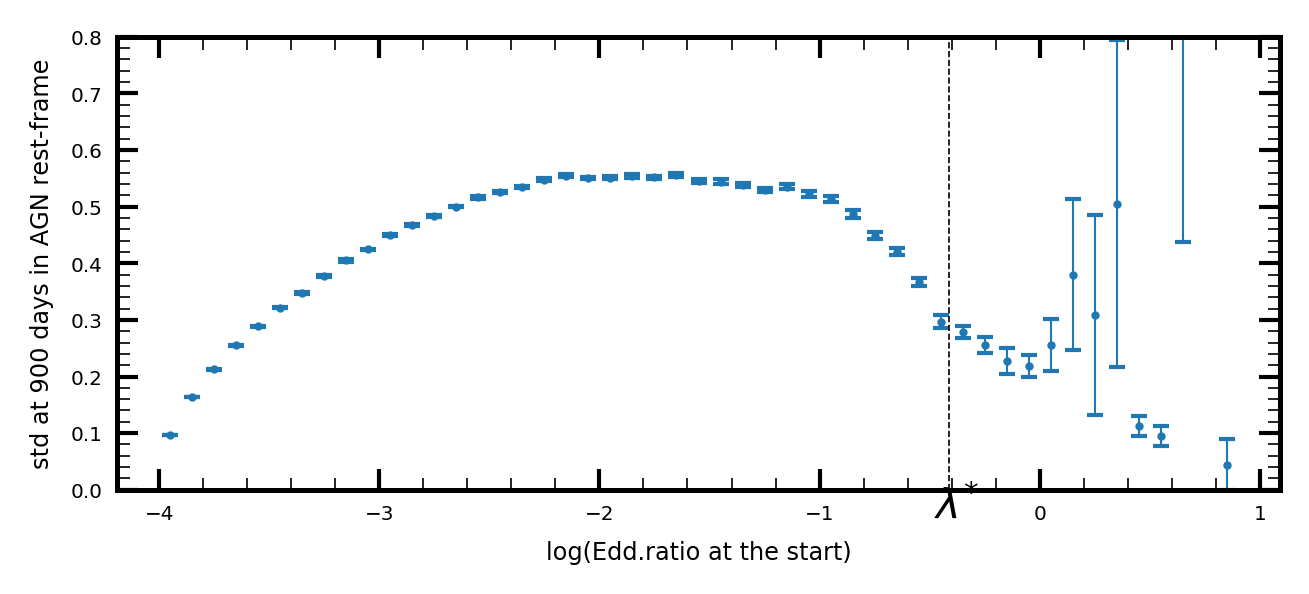

In [60]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_std_as_fun_of_Edd_ratio[:,0],yerr=measured_std_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('std at 900 days in AGN rest-frame')
plt.ylim(0,0.8)
plt.text(-0.48,-0.048,'$\lambda^{*}$',fontsize=10)

In [61]:
measured_mean_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.mean(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_mean_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_mean_as_fun_of_Edd_ratio=np.array(measured_mean_as_fun_of_Edd_ratio)


measured_median_as_fun_of_Edd_ratio=[]
for i in range(len(list_of_res_cut_as_function_of_Edd_ratio)):
    bootstrap_sample=[]
    for j in range(20):
        bootstrap_sample.append(np.median(bootstrap_resample(np.array(list_of_res_cut_as_function_of_Edd_ratio[i]))))
    measured_median_as_fun_of_Edd_ratio.append([np.mean(bootstrap_sample),np.std(bootstrap_sample)])

# first column = mean, second column = std
measured_median_as_fun_of_Edd_ratio=np.array(measured_median_as_fun_of_Edd_ratio)

/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/nevencaplar/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(-0.48,-0.26,'$\\lambda^{*}$')

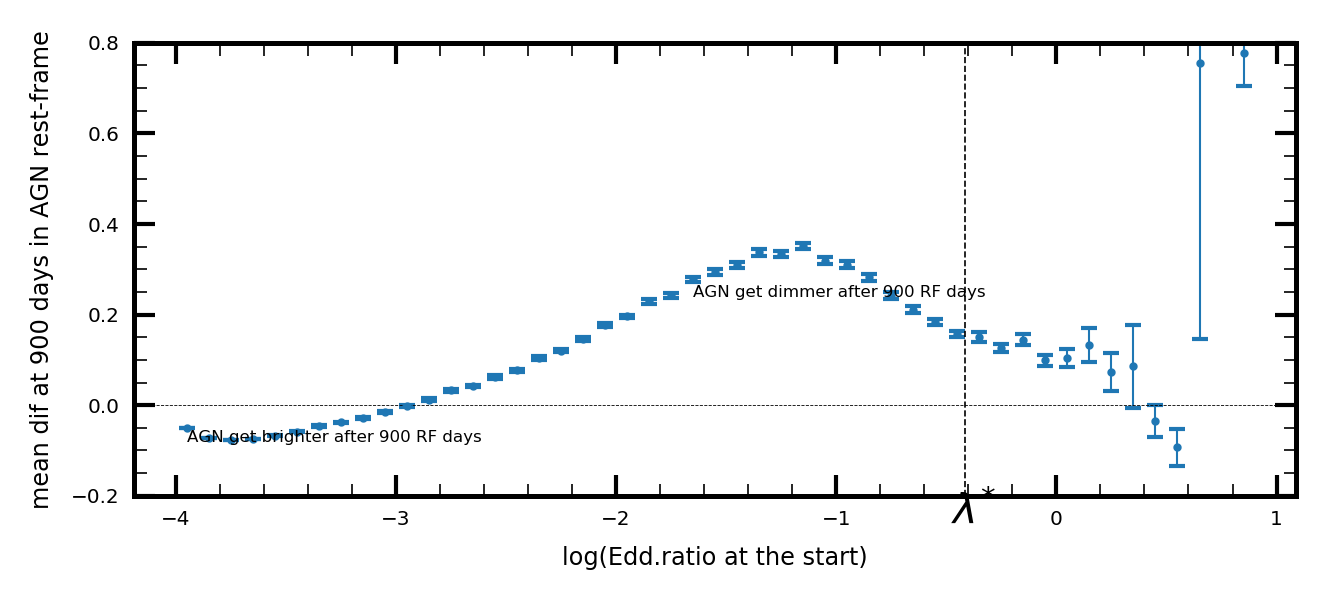

In [62]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_mean_as_fun_of_Edd_ratio[:,0],yerr=measured_mean_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('mean dif at 900 days in AGN rest-frame')
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.8)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.24,'AGN get dimmer after 900 RF days')
plt.text(-0.48,-0.26,'$\lambda^{*}$',fontsize=10)

Text(-1.65,0.2,'AGN get dimmer after 900 RF days')

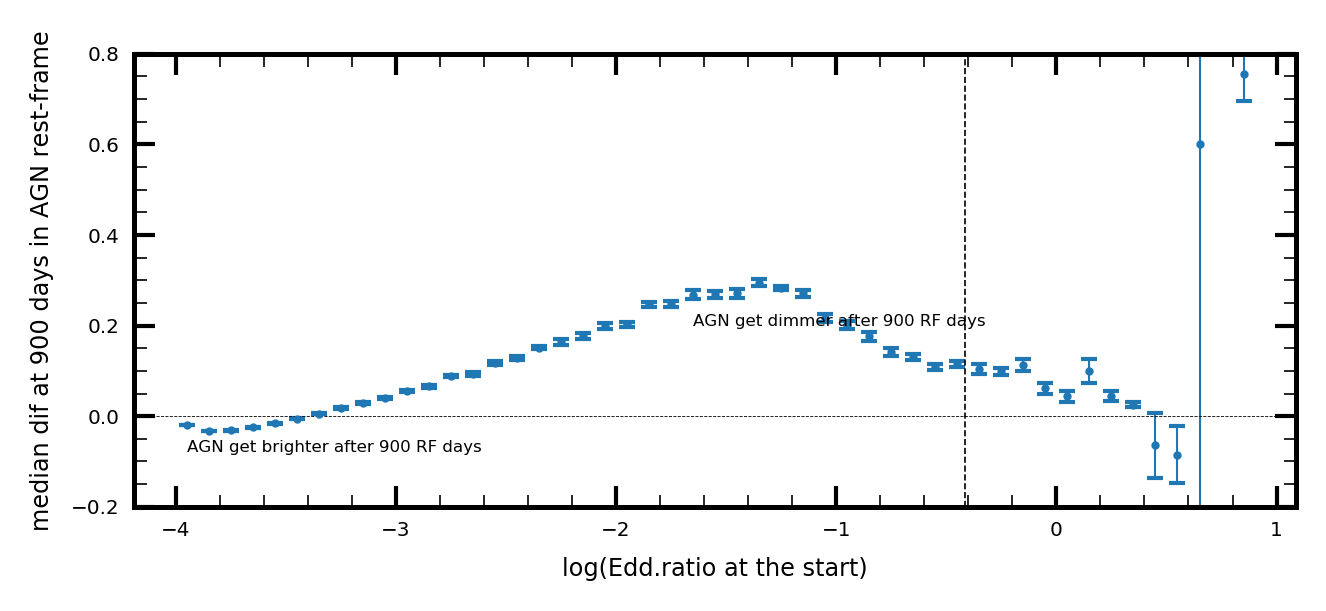

In [63]:
plt.figure(figsize=(5,2))
plt.errorbar(np.arange(-4,1.0,0.1)+0.05,measured_median_as_fun_of_Edd_ratio[:,0],yerr=measured_median_as_fun_of_Edd_ratio[:,1],lw=1, fmt='.',capsize=2,markersize=2.,elinewidth=0.5)
plt.axvline(np.log10(0.3851),ls='--',color='black',lw=0.4)
plt.xlabel('log(Edd.ratio at the start)')
plt.ylabel('median dif at 900 days in AGN rest-frame')
plt.ylim(0,0.4)
plt.axhline(0,ls='--',color='black',lw=0.2)
plt.ylim(-0.2,0.8)
plt.text(-3.95,-0.08,'AGN get brighter after 900 RF days')
plt.text(-1.65,0.2,'AGN get dimmer after 900 RF days')